In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
%matplotlib inline

In [8]:
%run ../Modules/Importing.py

In [ ]:
x1 = pd.read_csv('/Users/ballanr/Desktop/File Outputs/DR15/Wave and Flux/9753-57859-007.csv',index_col=False)
wave2 = x1['Wavelength']
flux2 = x1['Flux']
err2 = x1['Error']

emission1,bleh,blehh = f.Barycentric_Correction(11,0)
center1 = f.find_nearest(wave2,emission1)

wave1 = np.asarray(wave2[center1-301:center1+301])
flux1 = np.asarray(flux2[center1-301:center1+301])
err1 = np.asarray(err2[center1-301:center1+301])

L1 = 0
L2 = 151
R1 = 451
R2 = 602
Fc = (np.sum(flux1[L1:L2]) + np.sum(flux1[R1:R2])) / (len(flux1[L1:L2]) + len(flux1[R1:R2]))

plt.figure(figsize=(20,10))
plt.plot(wave1,flux1);
plt.axhline(Fc,color='red',ls='dashed');

In [ ]:
from PyAstronomy.pyasl import helcorr as hell
from astropy.io import fits

# APO

APO is apache point observatory: Latitude 32° 46' 49" N, Longitude 105° 49' 13" W, Elevation 2788 meters

In [ ]:
filename = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/apo25m/9753/57859/apVisit-apogee2-9753-57859-002.fits'
openfile = fits.open(filename)
header = openfile[0].header
header['BC'],header['RA'],header['DEC'],header['HJD']

In [ ]:
x = hell(-105.4913,36.4649,2788,82.8615778146,11.0229465933,2457650.9389914)

In [ ]:
x

In [ ]:
x[0]/header['BC'],header['BC']-x[0]

# LCO

LCO is Las Campanas Observatory: Latitude 29° 0′ 52.56″ S, Longitude 70° 41′ 33.36″ W, Elevation 2380m

In [ ]:
filename = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/lco25m/9856/57942/asVisit-apogee2-9856-57942-003.fits'
openfile = fits.open(filename)
header = openfile[0].header
header['BC'],header['RA'],header['DEC'],header['HJD']

In [ ]:
jd = header['JD-MID']
jd

In [ ]:
x = hell(-70.413336,-29.05256,2380,347.230220488, -5.085581975, 2457942.8861364)

In [ ]:
x

In [ ]:
x[0]/header['BC'],header['BC']-x[0]

In [ ]:
import pandas as pd
from astropy.io import fits as fits
import numpy as np
import itertools

In [ ]:
dr15table = pd.read_csv('/Users/ballanr/Desktop/File Outputs/forMdot_analysis.csv')
cols = ['Location ID','2Mass ID', 'Plate ID','MJD','Fiber','Telescope','Header BC','HelCorr BC','Difference (m/s)']
df = pd.DataFrame(columns=cols)

In [ ]:
rowstart = 0
g = 0
for index,row in itertools.islice(dr15table.iterrows(),rowstart,None):
    try:
        g+=1
        loc = row['LOCID']
        twomass = row['2MASS_ID']
        print(str(g))
        plateid = row['PLATE']
        mjd = row['MJD']
        
        if len(str(row['FIB'])) == 3:
            fiber = str(row['FIB'])
        elif len(str(row['FIB'])) == 2:
            fiber = '0' + str(row['FIB']) 
        else:
            fiber = '00' + str(row['FIB'])
            
        fitsfile = row['path-to-file-on-CoveyData']
        openfile = fits.open(fitsfile)
        header = openfile[0].header
        
        bc = header['BC']
        ra = header['RA']
        dec = header['DEC'] 
        jd = 2.4*(10**6)+header['HJD']
        telescope = header['TELESCOP']
        
        if telescope == 'apo25m':
            height = 2788
            long = -105.4913
            lat = 36.4649
        else:
            height = 2380
            long = -70.413336
            lat = -29.05256
        
        x = hell(long,lat,height,ra,dec,jd)
        difference = (bc - x[0])*1000
        data = [loc,twomass,plateid,mjd,fiber,telescope,bc,x[0],difference]
        df.loc[len(df)+1] = data
        openfile.close()
        
    except KeyError:
        print('Row '+str(g)+' has no BC value...')
            #problems.append((loc,twomass,plateid,mjd,fiber,'KeyError'))
        openfile.close()
        
    except FileNotFoundError:
        print('Row '+str(g)+' doesn\'t exist...')
            #problems.append((loc,twomass,plateid,mjd,fiber,'FileNotFound'))
        openfile.close()
            
df.to_csv('/Users/ballanr/Desktop/File Outputs/DR15/BC Test.csv',index=False)

In [ ]:
file = pd.read_csv('/Users/ballanr/Desktop/File Outputs/DR15/BC Test.csv')
difference = file['Difference (m/s)']

In [ ]:
plt.figure(figsize=(20,10))
weights = np.ones_like(difference)/float(len(difference))
plt.hist(difference,bins=np.arange(-15,25,1),weights=weights,edgecolor = 'black');
plt.xlabel('Velocity Seperation m/s',fontsize=18);
plt.ylabel('Percent of Total',fontsize=18);
plt.title('Header BC - HelCorr BC',fontsize = 20);
plt.grid(True)
plt.savefig('/Users/ballanr/Desktop/File Outputs/DR15/BC Hist.pdf',dpi = 300);

In [ ]:
gg = np.asarray(difference)

In [ ]:
gg = np.abs(gg)

In [ ]:
gg

In [ ]:
plt.figure(figsize=(20,10))
weights = np.ones_like(gg)/float(len(gg))
plt.hist(gg,bins=np.arange(0,25,2.5),weights=weights,edgecolor = 'black');
plt.xlabel('Velocity Seperation m/s',fontsize=18);
plt.ylabel('Percent of Total',fontsize=18);
plt.title('Header BC - HelCorr BC',fontsize = 20);
plt.grid(True)
#plt.savefig('/Users/ballanr/Desktop/File Outputs/DR15/BC Hist.pdf',dpi = 300);

In [ ]:
bbbb

In [17]:
import numpy as np
import pandas as pd
import itertools

In [18]:
df8 = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density 8 Ratios testcase.csv',usecols=(8,9,10,11,12,13,14))
df11 = pd.read_csv('/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density 11 Ratios testcase.csv',usecols=(8,9,10,11,12,13,14))

In [19]:
A = np.asarray([1,0.802011438,0.652139617,0.534214159,0.441135871,0.361861566,0.301124039,0.252612897,0.213172944,0.181561822])
A1 = np.asarray([1,0.796052632,0.644942434,0.527754934,0.436677632,0.359786184,0.300164474,0.252467105,0.213610197,0.182442434])
A2 = np.asarray([1,0.881554131,0.760090532,0.648811769,0.55186722,0.470011316,0.401357978,0.344662392,0.297246322,0.257600905])
b = [1,1.024178045,0.767604629,0.84560514,0.491509042,0.448962594,0.365232136,0.314040915,0.214283097,0.163918628]

In [20]:
r = b-A
r1 = b-A1
r2 = b-A2

In [21]:
re = 0
re1 = 0
re2 = 0
for i in range(len(r)):
    
    re += (r[i])**2
    re1 += (r1[i])**2
    re2 += (r2[i])**2
    
re = np.sqrt(re)
re1 = np.sqrt(re1)
re1 = np.sqrt(re2)

re,re1

(0.4218700309052798, 0.28480493106236277)

In [22]:
df1 = df8.as_matrix(columns=None)

In [23]:
df1

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ],
       [ 0.80201144,  0.79605263,  0.78911861,  0.78650935,  0.78435856,
         0.77961216,  0.77289932],
       [ 0.65213962,  0.64494243,  0.63525571,  0.63156723,  0.62863023,
         0.62185535,  0.61241484],
       [ 0.53421416,  0.52775493,  0.51751904,  0.5135797 ,  0.51040476,
         0.50340671,  0.49318698],
       [ 0.44113587,  0.43667763,  0.42676823,  0.42297418,  0.41984907,
         0.41325996,  0.40386071],
       [ 0.36186157,  0.35978618,  0.35321001,  0.35017809,  0.34781615,
         0.34224319,  0.33387585],
       [ 0.30112404,  0.30016447,  0.29466812,  0.29229742,  0.2901898 ,
         0.28563941,  0.27831188],
       [ 0.2526129 ,  0.25246711,  0.24809576,  0.24599288,  0.24445461,
         0.24043501,  0.2342165 ],
       [ 0.21317294,  0.2136102 ,  0.21038085,  0.2086821 ,  0.20731763,
         0.20403564,  0.1987888 ],
       [ 0.18156182,  0.1824

In [24]:
df2 = np.transpose(df1)

In [25]:
df2[0]

array([ 1.        ,  0.80201144,  0.65213962,  0.53421416,  0.44113587,
        0.36186157,  0.30112404,  0.2526129 ,  0.21317294,  0.18156182])

In [26]:
residual = []
for i in range(len(df2)):
    r = b - df2[i]
    r2 = 0
    for k in range(len(r)):
        r2 += (r[k])**2
    r2 = np.sqrt(r2)
    residual.append(r2)

In [27]:
residual

[0.4218700309052798,
 0.43294757894594493,
 0.45095650486598327,
 0.45812397397205379,
 0.46395136038756507,
 0.47711308328519358,
 0.49654306669263382]

In [28]:
temps = [3750,5000,7500,8750,10000,12500,15000]
density = np.arange(8,12.6,0.2)

In [29]:
cols = []
for i in range(len(density)):
    for k in range(len(temps)):
        string = str(density[i])+'/'+str(temps[k])
        cols.append(string)

In [30]:
cols

['8.0/3750',
 '8.0/5000',
 '8.0/7500',
 '8.0/8750',
 '8.0/10000',
 '8.0/12500',
 '8.0/15000',
 '8.2/3750',
 '8.2/5000',
 '8.2/7500',
 '8.2/8750',
 '8.2/10000',
 '8.2/12500',
 '8.2/15000',
 '8.4/3750',
 '8.4/5000',
 '8.4/7500',
 '8.4/8750',
 '8.4/10000',
 '8.4/12500',
 '8.4/15000',
 '8.6/3750',
 '8.6/5000',
 '8.6/7500',
 '8.6/8750',
 '8.6/10000',
 '8.6/12500',
 '8.6/15000',
 '8.8/3750',
 '8.8/5000',
 '8.8/7500',
 '8.8/8750',
 '8.8/10000',
 '8.8/12500',
 '8.8/15000',
 '9.0/3750',
 '9.0/5000',
 '9.0/7500',
 '9.0/8750',
 '9.0/10000',
 '9.0/12500',
 '9.0/15000',
 '9.2/3750',
 '9.2/5000',
 '9.2/7500',
 '9.2/8750',
 '9.2/10000',
 '9.2/12500',
 '9.2/15000',
 '9.4/3750',
 '9.4/5000',
 '9.4/7500',
 '9.4/8750',
 '9.4/10000',
 '9.4/12500',
 '9.4/15000',
 '9.6/3750',
 '9.6/5000',
 '9.6/7500',
 '9.6/8750',
 '9.6/10000',
 '9.6/12500',
 '9.6/15000',
 '9.8/3750',
 '9.8/5000',
 '9.8/7500',
 '9.8/8750',
 '9.8/10000',
 '9.8/12500',
 '9.8/15000',
 '10.0/3750',
 '10.0/5000',
 '10.0/7500',
 '10.0/8750',
 '10

In [31]:
mdf = pd.DataFrame(columns = cols)

In [32]:
somearray = []
for i in range(len(density)):
    
    filepath = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Density Files/Density ' + str(density[i]) + ' Ratios.csv'
    openfile = pd.read_csv(filepath,usecols=(1,2,3,4,5,6,7))
    #penfile = np.transpose(openfile)
    
    for column,data in itertools.islice(openfile.iteritems(),0,None):
        #print(column)
        #print(data)
        somearray.append(np.asarray(data))

In [33]:
for i in range(len(somearray)):
    colname = cols[i]
    mdf[colname] = somearray[i]

In [34]:
mdf.to_csv('/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Superfuntestfile.csv',index=False)

In [35]:
allfile = '/Users/ballanr/Desktop/File Outputs/Brackett Decrements/Superfuntestfile.csv'
openallfile = pd.read_csv(allfile)

In [36]:
resid = []
for i in range(len(cols)):
    
    A = openallfile[cols[i]]
    b = [1,1.024178045,0.767604629,0.84560514,0.491509042,0.448962594,0.365232136,0.314040915,0.214283097,0.163918628]
    
    A = A / A[0]
    
    r = b - A
    
    r2 = 0
    
    for k in range(len(r)):
        
        r2 += (r[k])**2
    
    r2 = np.sqrt(r2)
    resid.append((i,r2))

In [37]:
len(resid)

161

In [38]:
x = min(b for (a,b) in resid)

In [51]:
y=np.where(resid == x)

In [53]:
cols[y[0][0]]

'12.2/5000'

In [40]:
resid[148]

(148, 0.28187426601190224)

In [50]:
cols[148]

'12.2/5000'

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits

In [12]:
plate = '9246'
mjd = '57650'
fiber = '291'
filename1 = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/apo25m/'+plate+'/'+mjd+'/apVisit-apogee2-'+plate+'-'+mjd+'-'+fiber+'.fits'
#filename1 = '/Volumes/CoveyData/APOGEE_Spectra/preDR15/apogee/spectro/redux/visits/lco25m/'+plate+'/'+mjd+'/asVisit-apogee2-'+plate+'-'+mjd+'-'+fiber+'.fits'
openfile = fits.open(filename1)
wave = openfile[4]
flux = openfile[1]
error = openfile[2]

In [13]:
x1 = wave.data[0]
x2 = wave.data[1]
x3 = wave.data[2]
y1 = flux.data[0]
y2 = flux.data[1]
y3 = flux.data[2]
z1 = error.data[0]
z2 = error.data[1]
z3 = error.data[2]

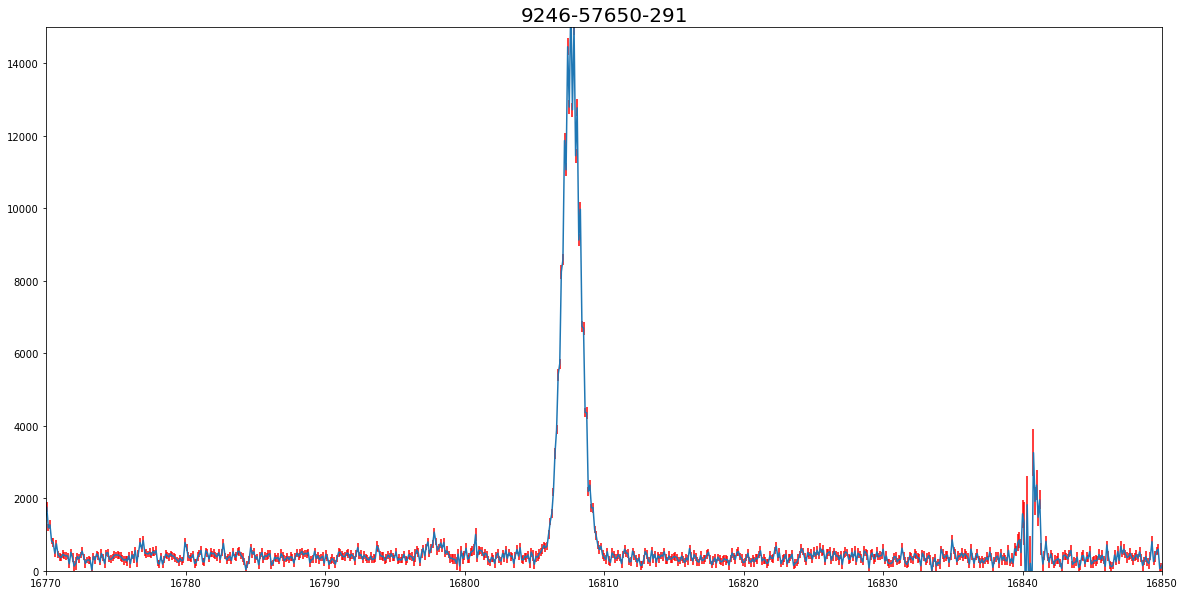

In [27]:
plt.figure(figsize=(20,10));
plt.errorbar(x1,y1,yerr=z1,color=color2,ecolor='red');
plt.errorbar(x2,y2,yerr=z2,color=color2,ecolor='red');
plt.errorbar(x3,y3,yerr=z3,color=color2,ecolor='red');
plt.title(plate+'-'+mjd+'-'+fiber,fontsize=20);
#plt.xlim(16700,16900)
#plt.savefig('/Users/ballanr/Desktop/Odd Spectra.pdf',bbox_to_inches='tight',dpi=300)
plt.xlim(16770,16850);
plt.ylim(0,15000)
plt.show();

In [26]:
color2 = (31/255.,119/255.,180/255.)